# xarrayを使ったクイックルック
xarrayとは軸情報（xarray用語ではラベルというようです。）を含む多次元配列をpythonで扱うためのライブラリーです。NetCDFファイルの入出力を行ったり、演算、描画を行うことが可能です。ここでは、https://www.esrl.noaa.gov/psd/data/gridded/data.interp_OLR.html からNOAAのOLRデータolr.day.mean.ncをダウンロードし、
それをマップで描画してみます。

まずは描画結果をjupyter notebookに表示するためのおまじないです。

In [1]:
%matplotlib inline

続いて必要なライブラリーを読み込みます。
xarrayをxrとして読み込むのは、xarrayがその昔、xrayという名前で開発されていたことに由来するようです。

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import xarray as xr
from pandas.plotting import register_matplotlib_converters
register_matplotlib_converters()

NetCDFファイルをオープンして、dsという名前をつけます。  
このファイルには(lon,lat,time)を軸に持つolrという変数と、(nmiss, time)を軸に持つinfoという変数があることがわかります。

In [3]:
ds = xr.open_dataset("olr.day.mean.nc")
ds

<xarray.Dataset>
Dimensions:  (lat: 73, lon: 144, nmiss: 7, time: 16630)
Coordinates:
  * lon      (lon) float32 0.0 2.5 5.0 7.5 10.0 ... 350.0 352.5 355.0 357.5
  * lat      (lat) float32 90.0 87.5 85.0 82.5 80.0 ... -82.5 -85.0 -87.5 -90.0
  * time     (time) datetime64[ns] 1974-06-01 1974-06-02 ... 2019-12-11
Dimensions without coordinates: nmiss
Data variables:
    olr      (time, lat, lon) float32 ...
    info     (time, nmiss) float32 ...
Attributes:
    title:          Daily Mean Interpolated OLR
    history:        Tue May 10 11:37:33 2005: ncatted -a missing_value,info,o...
    description:    Data is interpolated in time and space from NOAA twice-da...
    platform:       Observation
    Conventions:    CF-1.2
    References:     https://www.esrl.noaa.gov/psd/data/gridded/data.interp_OL...
    references:     https://www.esrl.noaa.gov/psd/data/gridded/data.interp_OL...
    NCO:            4.0.0
    Citation:       Liebmann and Smith: June 2006: Description of a Complete ...
 

dsの後ろにドットをつけて、それに続けて変数名を書くと変数データにアクセスできます。

In [4]:
ds.olr

<xarray.DataArray 'olr' (time: 16630, lat: 73, lon: 144)>
[174814560 values with dtype=float32]
Coordinates:
  * lon      (lon) float32 0.0 2.5 5.0 7.5 10.0 ... 350.0 352.5 355.0 357.5
  * lat      (lat) float32 90.0 87.5 85.0 82.5 80.0 ... -82.5 -85.0 -87.5 -90.0
  * time     (time) datetime64[ns] 1974-06-01 1974-06-02 ... 2019-12-11
Attributes:
    long_name:             Daily OLR
    unpacked_valid_range:  [  0. 500.]
    actual_range:          [ 64.75 344.5 ]
    units:                 W/m^2
    var_desc:              Outgoing Longwave Radiation
    precision:             2
    dataset:               NOAA Interpolated OLR
    level_desc:            Other
    statistic:             Mean
    parent_stat:           Individual Obs
    valid_range:           [-32765  17235]

## 切り出し
インデックスによる切り出しは`isel`でできます。  
FORTRANではインデックスは１から始まりますが、Pythonではインデックスは0から始まります。

In [5]:
ds.olr.isel(lat=0,lon=0)

<xarray.DataArray 'olr' (time: 16630)>
array([205.45   , 195.4    , 196.34999, ..., 173.     , 181.     , 178.     ],
      dtype=float32)
Coordinates:
    lon      float32 0.0
    lat      float32 90.0
  * time     (time) datetime64[ns] 1974-06-01 1974-06-02 ... 2019-12-11
Attributes:
    long_name:             Daily OLR
    unpacked_valid_range:  [  0. 500.]
    actual_range:          [ 64.75 344.5 ]
    units:                 W/m^2
    var_desc:              Outgoing Longwave Radiation
    precision:             2
    dataset:               NOAA Interpolated OLR
    level_desc:            Other
    statistic:             Mean
    parent_stat:           Individual Obs
    valid_range:           [-32765  17235]

`sel`を使えば緯度経度などのラベルの値による切り出しもできます。上の例と同じ結果は以下のようにしても得られます。

In [6]:
ds.olr.sel(lon=0, lat=90)

<xarray.DataArray 'olr' (time: 16630)>
array([205.45   , 195.4    , 196.34999, ..., 173.     , 181.     , 178.     ],
      dtype=float32)
Coordinates:
    lon      float32 0.0
    lat      float32 90.0
  * time     (time) datetime64[ns] 1974-06-01 1974-06-02 ... 2019-12-11
Attributes:
    long_name:             Daily OLR
    unpacked_valid_range:  [  0. 500.]
    actual_range:          [ 64.75 344.5 ]
    units:                 W/m^2
    var_desc:              Outgoing Longwave Radiation
    precision:             2
    dataset:               NOAA Interpolated OLR
    level_desc:            Other
    statistic:             Mean
    parent_stat:           Individual Obs
    valid_range:           [-32765  17235]

日付による切り出しは以下のように行います。

In [7]:
ds.olr.sel(time='1979-01-01')

<xarray.DataArray 'olr' (lat: 73, lon: 144)>
array([[156.75   , 156.75   , 156.75   , ..., 156.75   , 156.75   , 156.75   ],
       [153.3    , 153.3    , 153.34999, ..., 153.25   , 153.25   , 153.25   ],
       [164.95   , 178.59999, 186.25   , ..., 182.2    , 187.15   , 176.06   ],
       ...,
       [184.65   , 184.25   , 183.81   , ..., 185.81   , 185.45   , 185.09999],
       [182.7    , 182.4    , 182.15   , ..., 183.5    , 183.2    , 182.95   ],
       [178.09999, 178.09999, 178.09999, ..., 178.09999, 178.09999, 178.09999]],
      dtype=float32)
Coordinates:
  * lon      (lon) float32 0.0 2.5 5.0 7.5 10.0 ... 350.0 352.5 355.0 357.5
  * lat      (lat) float32 90.0 87.5 85.0 82.5 80.0 ... -82.5 -85.0 -87.5 -90.0
    time     datetime64[ns] 1979-01-01
Attributes:
    long_name:             Daily OLR
    unpacked_valid_range:  [  0. 500.]
    actual_range:          [ 64.75 344.5 ]
    units:                 W/m^2
    var_desc:              Outgoing Longwave Radiation
    precision:

範囲を指定するには`slice`を使います。このデータは北極から入っているのでlatの範囲指定に注意しましょう。

In [8]:
ds.olr.sel(time=slice('1979-01-01', '1979-12-31'), lon=slice(0, 180), lat=slice(30, -30))

<xarray.DataArray 'olr' (time: 365, lat: 25, lon: 73)>
[666125 values with dtype=float32]
Coordinates:
  * lon      (lon) float32 0.0 2.5 5.0 7.5 10.0 ... 172.5 175.0 177.5 180.0
  * lat      (lat) float32 30.0 27.5 25.0 22.5 20.0 ... -22.5 -25.0 -27.5 -30.0
  * time     (time) datetime64[ns] 1979-01-01 1979-01-02 ... 1979-12-31
Attributes:
    long_name:             Daily OLR
    unpacked_valid_range:  [  0. 500.]
    actual_range:          [ 64.75 344.5 ]
    units:                 W/m^2
    var_desc:              Outgoing Longwave Radiation
    precision:             2
    dataset:               NOAA Interpolated OLR
    level_desc:            Other
    statistic:             Mean
    parent_stat:           Individual Obs
    valid_range:           [-32765  17235]

## おまかせ描画
`plot()`はおまかせで適当に描画をしてくれます。

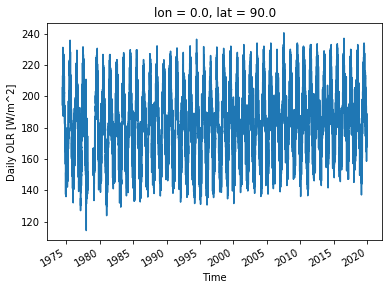

In [9]:
ds.olr.sel(lon=0, lat=90).plot()

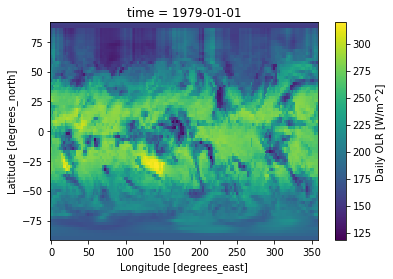

In [10]:
ds.olr.sel(time='1979-01-01').plot()